In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [230]:
df_1=pd.read_csv('downloads/datfda20241210/Applications.txt',sep='\t')

In [231]:
df_1.head()

,ApplNo,ApplType,ApplPublicNotes,SponsorName
0,4,NDA,NaN,PHARMICS
1,159,NDA,NaN,LILLY
2,552,NDA,NaN,ASPEN GLOBAL INC
3,734,NDA,NaN,LILLY
4,793,NDA,NaN,NORVIUM BIOSCIENCE


In [232]:
df_1.drop(columns='ApplPublicNotes',inplace=True)

In [233]:
df_1.head()

,ApplNo,ApplType,SponsorName
0,4,NDA,PHARMICS
1,159,NDA,LILLY
2,552,NDA,ASPEN GLOBAL INC
3,734,NDA,LILLY
4,793,NDA,NORVIUM BIOSCIENCE


In [234]:
df_2=pd.read_csv('downloads/datfda20241210/Products.txt',sep='\t')

In [235]:
df_2.head()

,ApplNo,ProductNo,Form,Strength,ReferenceDrug,DrugName,ActiveIngredient,ReferenceStandard
0,4,4,SOLUTION/DROPS;OPHTHALMIC,1%,0.0,PAREDRINE,HYDROXYAMPHETAMINE HYDROBROMIDE,0.0
1,159,1,TABLET;ORAL,500MG,0.0,SULFAPYRIDINE,SULFAPYRIDINE,0.0
2,552,1,INJECTABLE;INJECTION,"20,000 UNITS/ML",0.0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0.0
3,552,2,INJECTABLE;INJECTION,"40,000 UNITS/ML",0.0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0.0
4,552,3,INJECTABLE;INJECTION,"5,000 UNITS/ML",0.0,LIQUAEMIN SODIUM,HEPARIN SODIUM,0.0


In [236]:
df_2.shape

(48576, 8)

In [237]:
df_2.drop_duplicates(subset=['DrugName','ActiveIngredient'],inplace=True)

In [238]:
df_2.shape

(8219, 8)

In [239]:
df_2.drop(columns=['ReferenceStandard','ReferenceDrug'],inplace=True)

In [240]:
df_2.head()

,ApplNo,ProductNo,Form,Strength,DrugName,ActiveIngredient
0,4,4,SOLUTION/DROPS;OPHTHALMIC,1%,PAREDRINE,HYDROXYAMPHETAMINE HYDROBROMIDE
1,159,1,TABLET;ORAL,500MG,SULFAPYRIDINE,SULFAPYRIDINE
2,552,1,INJECTABLE;INJECTION,"20,000 UNITS/ML",LIQUAEMIN SODIUM,HEPARIN SODIUM
7,552,7,INJECTABLE;INJECTION,100 UNITS/ML,LIQUAEMIN LOCK FLUSH,HEPARIN SODIUM
8,552,8,INJECTABLE;INJECTION,"1,000 UNITS/ML",HEPARIN SODIUM,HEPARIN SODIUM


In [241]:
df_3=pd.read_csv('downloads/datfda20241210/MarketingStatus.txt',sep='\t')

In [242]:
df_3.head()

,MarketingStatusID,ApplNo,ProductNo
0,3,4,4
1,3,159,1
2,3,552,1
3,3,552,2
4,3,552,3


In [243]:
df_4=pd.read_csv('downloads/datfda20241210/MarketingStatus_Lookup.txt',sep='\t')

In [244]:
df_4.head()

,MarketingStatusID,MarketingStatusDescription
0,1,Prescription
1,2,Over-the-counter
2,3,Discontinued
3,4,None (Tentative Approval)
4,5,For Further Manufacturing Use


In [245]:
df_5=pd.read_csv('downloads/datfda20241210/Submissions.txt',sep='\t')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 82820: invalid start byte

<font size='3'> Using different  enconding to load the Data

In [246]:
df_5=pd.read_csv('downloads/datfda20241210/Submissions.txt',sep='\t',encoding='ISO-8859-1')

In [247]:
df_5.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,SubmissionsPublicNotes,ReviewPriority
0,4,19.0,ORIG,1,AP,1969-07-16 00:00:00,NaN,UNKNOWN
1,4,3.0,SUPPL,10,AP,1980-05-08 00:00:00,NaN,NaN
2,4,3.0,SUPPL,11,AP,1987-05-26 00:00:00,NaN,NaN
3,159,NaN,ORIG,1,AP,1939-03-09 00:00:00,NaN,NaN
4,159,3.0,SUPPL,3,AP,1986-12-09 00:00:00,NaN,NaN


In [248]:
df_1['ApplType'].value_counts()

ApplType
ANDA    21731
NDA      5701
BLA       415
Name: count, dtype: int64

<font size='3'> we would remove ANDA as our analysis focuses on new drug

In [249]:
df_1=df_1[df_1['ApplType']!='ANDA']

In [250]:
df_5['SubmissionStatus'].value_counts()

SubmissionStatus
AP    183992
TA      1097
Name: count, dtype: int64

<font size='3'> we would only keep AP (Approved)

In [251]:
df_5=df_5[df_5['SubmissionStatus']=='AP']

In [252]:
df_5['SubmissionType'].value_counts()

SubmissionType
SUPPL    158777
ORIG      25215
Name: count, dtype: int64

In [253]:
df_5=df_5[df_5['SubmissionType']=='ORIG']

<font size='3'> We would only keep ORIG (original)

In [254]:
df_5.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,SubmissionsPublicNotes,ReviewPriority
0,4,19.0,ORIG,1,AP,1969-07-16 00:00:00,NaN,UNKNOWN
3,159,NaN,ORIG,1,AP,1939-03-09 00:00:00,NaN,NaN
6,415,NaN,ORIG,1,AP,1939-02-27 00:00:00,NaN,NaN
23,552,19.0,ORIG,1,AP,1939-02-09 00:00:00,NaN,UNKNOWN
24,654,19.0,ORIG,1,AP,1939-05-04 00:00:00,NaN,UNKNOWN


In [255]:
df_5.isna().sum()

ApplNo                        0
SubmissionClassCodeID     11642
SubmissionType                0
SubmissionNo                  0
SubmissionStatus              0
SubmissionStatusDate          1
SubmissionsPublicNotes    25175
ReviewPriority            13507
dtype: int64

<font size='3'> Removing SubmissionsPublicNotes column

In [256]:
df_5.drop(columns=['SubmissionsPublicNotes'],inplace=True)

In [257]:
df_5.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority
0,4,19.0,ORIG,1,AP,1969-07-16 00:00:00,UNKNOWN
3,159,NaN,ORIG,1,AP,1939-03-09 00:00:00,NaN
6,415,NaN,ORIG,1,AP,1939-02-27 00:00:00,NaN
23,552,19.0,ORIG,1,AP,1939-02-09 00:00:00,UNKNOWN
24,654,19.0,ORIG,1,AP,1939-05-04 00:00:00,UNKNOWN


In [258]:
df_2.head()

,ApplNo,ProductNo,Form,Strength,DrugName,ActiveIngredient
0,4,4,SOLUTION/DROPS;OPHTHALMIC,1%,PAREDRINE,HYDROXYAMPHETAMINE HYDROBROMIDE
1,159,1,TABLET;ORAL,500MG,SULFAPYRIDINE,SULFAPYRIDINE
2,552,1,INJECTABLE;INJECTION,"20,000 UNITS/ML",LIQUAEMIN SODIUM,HEPARIN SODIUM
7,552,7,INJECTABLE;INJECTION,100 UNITS/ML,LIQUAEMIN LOCK FLUSH,HEPARIN SODIUM
8,552,8,INJECTABLE;INJECTION,"1,000 UNITS/ML",HEPARIN SODIUM,HEPARIN SODIUM


In [259]:
df_3.head()

,MarketingStatusID,ApplNo,ProductNo
0,3,4,4
1,3,159,1
2,3,552,1
3,3,552,2
4,3,552,3


In [260]:
df_4.head()

,MarketingStatusID,MarketingStatusDescription
0,1,Prescription
1,2,Over-the-counter
2,3,Discontinued
3,4,None (Tentative Approval)
4,5,For Further Manufacturing Use


<font size='3'> Exclude None(Tentative Approval)

In [261]:
df_4=df_4[df_4['MarketingStatusID']!=4]
df_4

,MarketingStatusID,MarketingStatusDescription
0,1,Prescription
1,2,Over-the-counter
2,3,Discontinued
4,5,For Further Manufacturing Use


In [262]:
df_5.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority
0,4,19.0,ORIG,1,AP,1969-07-16 00:00:00,UNKNOWN
3,159,NaN,ORIG,1,AP,1939-03-09 00:00:00,NaN
6,415,NaN,ORIG,1,AP,1939-02-27 00:00:00,NaN
23,552,19.0,ORIG,1,AP,1939-02-09 00:00:00,UNKNOWN
24,654,19.0,ORIG,1,AP,1939-05-04 00:00:00,UNKNOWN


In [263]:
df_5['SubmissionClassCodeID'].value_counts()

SubmissionClassCodeID
19.0    7527
7.0     1700
12.0    1629
15.0    1193
5.0      525
14.0     333
9.0      171
16.0     117
23.0      83
8.0       78
17.0      46
2.0       30
18.0      29
13.0      27
24.0      27
10.0      17
22.0      15
11.0      10
25.0       6
26.0       5
6.0        2
3.0        2
27.0       1
Name: count, dtype: int64

In [264]:
df_6=pd.read_csv('downloads/datfda20241210/SubmissionClass_Lookup.txt',sep='\t')

In [265]:
df_6

,SubmissionClassCodeID,SubmissionClassCode,SubmissionClassCodeDescription
0,1,BIOEQUIV,Bioequivalence
1,2,EFFICACY,Efficacy
2,3,LABELING,Labeling
3,4,MANUF (CMC),Manufacturing (CMC)
4,5,NaN,Not Applicable
5,6,S,Supplement
6,7,TYPE 1,Type 1 - New Molecular Entity
7,8,TYPE 1/4,Type 1 - New Molecular Entity and Type 4 - New...
8,9,TYPE 2,Type 2 - New Active Ingredient
9,10,TYPE 2/3,Type 2 - New Active Ingredient and Type 3 - Ne...


<font size='3'> So by looking as SubmissionClassCodeID we would only keep new drugs

In [266]:
df_submission=pd.merge(df_5,df_6,on='SubmissionClassCodeID',how='inner')

In [267]:
df_submission.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,SubmissionClassCode,SubmissionClassCodeDescription
0,4,19.0,ORIG,1,AP,1969-07-16 00:00:00,UNKNOWN,UNKNOWN,NaN
1,552,19.0,ORIG,1,AP,1939-02-09 00:00:00,UNKNOWN,UNKNOWN,NaN
2,654,19.0,ORIG,1,AP,1939-05-04 00:00:00,UNKNOWN,UNKNOWN,NaN
3,793,19.0,ORIG,1,AP,1939-06-05 00:00:00,UNKNOWN,UNKNOWN,NaN
4,1384,19.0,ORIG,1,AP,1939-08-17 00:00:00,UNKNOWN,UNKNOWN,NaN


In [268]:
df_submission['SubmissionClassCode'].value_counts()

SubmissionClassCode
UNKNOWN         7527
TYPE 1          1700
TYPE 3          1629
TYPE 5          1193
TYPE 4           333
TYPE 2           171
TYPE 6           117
MEDGAS            83
TYPE 1/4          78
TYPE 7            46
EFFICACY          30
TYPE 8            29
TYPE 3/4          27
TYPE 9            27
TYPE 2/3          17
TYPE 10           15
TYPE 2/4          10
TYPE 9- BLA        6
TYPE 4/5           5
S                  2
LABELING           2
TYPE 10- BLA       1
Name: count, dtype: int64

In [269]:
new_drug_submission_types = [
    'TYPE 1', 'TYPE 2', 'TYPE 3', 'TYPE 4', 'TYPE 5', 
    'TYPE 9', 'TYPE 10', 'BIOSIMILAR', 'TYPE 1/4', 
    'TYPE 2/3', 'TYPE 2/4', 'TYPE 3/4'
]
non_new_drug_submission_types = ['BIOEQUIV', 'EFFICACY', 'LABELING', 'MANUF (CMC)', 'S']

In [270]:
df_submission=df_submission[~df_submission['SubmissionClassCodeID'].isin(non_new_drug_submission_types)]

In [271]:
df_submission.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,SubmissionClassCode,SubmissionClassCodeDescription
0,4,19.0,ORIG,1,AP,1969-07-16 00:00:00,UNKNOWN,UNKNOWN,NaN
1,552,19.0,ORIG,1,AP,1939-02-09 00:00:00,UNKNOWN,UNKNOWN,NaN
2,654,19.0,ORIG,1,AP,1939-05-04 00:00:00,UNKNOWN,UNKNOWN,NaN
3,793,19.0,ORIG,1,AP,1939-06-05 00:00:00,UNKNOWN,UNKNOWN,NaN
4,1384,19.0,ORIG,1,AP,1939-08-17 00:00:00,UNKNOWN,UNKNOWN,NaN


In [272]:
df_submission.shape

(13573, 9)

In [273]:
df_submission=df_submission[df_submission['SubmissionClassCode']!='UNKNOWN']

In [274]:
df_submission.head()

,ApplNo,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,SubmissionClassCode,SubmissionClassCodeDescription
7527,1205,7.0,ORIG,1,AP,1939-07-17 00:00:00,STANDARD,TYPE 1,Type 1 - New Molecular Entity
7528,4782,7.0,ORIG,1,AP,1942-05-08 00:00:00,STANDARD,TYPE 1,Type 1 - New Molecular Entity
7529,5010,7.0,ORIG,1,AP,1942-11-10 00:00:00,STANDARD,TYPE 1,Type 1 - New Molecular Entity
7530,5213,7.0,ORIG,1,AP,1943-03-23 00:00:00,STANDARD,TYPE 1,Type 1 - New Molecular Entity
7531,5657,7.0,ORIG,1,AP,1945-02-20 00:00:00,PRIORITY,TYPE 1,Type 1 - New Molecular Entity


In [275]:
# Merging Application and Submission df
df_app_sub=pd.merge(df_1,df_submission,on='ApplNo',how='inner')

In [276]:
df_app_sub.head(2)

,ApplNo,ApplType,SponsorName,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,SubmissionClassCode,SubmissionClassCodeDescription
0,2282,NDA,ISO TEX,14.0,ORIG,1,AP,1940-04-30 00:00:00,STANDARD,TYPE 4,Type 4 - New Combination
1,2386,NDA,GD SEARLE LLC,15.0,ORIG,1,AP,1940-04-19 00:00:00,STANDARD,TYPE 5,Type 5 - New Formulation or New Manufacturer


In [277]:
df_2.head(1)

,ApplNo,ProductNo,Form,Strength,DrugName,ActiveIngredient
0,4,4,SOLUTION/DROPS;OPHTHALMIC,1%,PAREDRINE,HYDROXYAMPHETAMINE HYDROBROMIDE


In [278]:
# Merging app_sub and Product df
df_app_sub_po=pd.merge(df_app_sub,df_2,on=['ApplNo'],how='inner')

In [279]:
df_app_sub_po.head()

,ApplNo,ApplType,SponsorName,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,SubmissionClassCode,SubmissionClassCodeDescription,ProductNo,Form,Strength,DrugName,ActiveIngredient
0,2282,NDA,ISO TEX,14.0,ORIG,1,AP,1940-04-30 00:00:00,STANDARD,TYPE 4,Type 4 - New Combination,1,INJECTABLE;INJECTION,100MG/ML,INULIN AND SODIUM CHLORIDE,INULIN
1,2386,NDA,GD SEARLE LLC,15.0,ORIG,1,AP,1940-04-19 00:00:00,STANDARD,TYPE 5,Type 5 - New Formulation or New Manufacturer,2,TABLET;ORAL,100MG,AMINOPHYLLIN,AMINOPHYLLINE
2,4782,NDA,WYETH PHARMS,7.0,ORIG,1,AP,1942-05-08 00:00:00,STANDARD,TYPE 1,Type 1 - New Molecular Entity,1,TABLET;ORAL,1.25MG,PREMARIN,"ESTROGENS, CONJUGATED"
3,5010,NDA,QUAGEN,7.0,ORIG,1,AP,1942-11-10 00:00:00,STANDARD,TYPE 1,Type 1 - New Molecular Entity,1,TABLET;ORAL,50MG **Federal Register determination that pro...,DEMEROL,MEPERIDINE HYDROCHLORIDE
4,5213,NDA,GENUS,7.0,ORIG,1,AP,1943-03-23 00:00:00,STANDARD,TYPE 1,Type 1 - New Molecular Entity,1,TABLET;ORAL,1.5MG;5MG,HYCODAN,HOMATROPINE METHYLBROMIDE; HYDROCODONE BITARTRATE


In [280]:
# Final merge 
df_app_sub_po_mar=pd.merge(df_app_sub_po,df_3,on=['ApplNo','ProductNo'],how='inner')

In [281]:
df_app_sub_po_mar.head()

,ApplNo,ApplType,SponsorName,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,SubmissionClassCode,SubmissionClassCodeDescription,ProductNo,Form,Strength,DrugName,ActiveIngredient,MarketingStatusID
0,2282,NDA,ISO TEX,14.0,ORIG,1,AP,1940-04-30 00:00:00,STANDARD,TYPE 4,Type 4 - New Combination,1,INJECTABLE;INJECTION,100MG/ML,INULIN AND SODIUM CHLORIDE,INULIN,3
1,2386,NDA,GD SEARLE LLC,15.0,ORIG,1,AP,1940-04-19 00:00:00,STANDARD,TYPE 5,Type 5 - New Formulation or New Manufacturer,2,TABLET;ORAL,100MG,AMINOPHYLLIN,AMINOPHYLLINE,3
2,4782,NDA,WYETH PHARMS,7.0,ORIG,1,AP,1942-05-08 00:00:00,STANDARD,TYPE 1,Type 1 - New Molecular Entity,1,TABLET;ORAL,1.25MG,PREMARIN,"ESTROGENS, CONJUGATED",1
3,5010,NDA,QUAGEN,7.0,ORIG,1,AP,1942-11-10 00:00:00,STANDARD,TYPE 1,Type 1 - New Molecular Entity,1,TABLET;ORAL,50MG **Federal Register determination that pro...,DEMEROL,MEPERIDINE HYDROCHLORIDE,3
4,5213,NDA,GENUS,7.0,ORIG,1,AP,1943-03-23 00:00:00,STANDARD,TYPE 1,Type 1 - New Molecular Entity,1,TABLET;ORAL,1.5MG;5MG,HYCODAN,HOMATROPINE METHYLBROMIDE; HYDROCODONE BITARTRATE,1


In [282]:
df=df_app_sub_po_mar.copy()

In [283]:
df.isna().sum()

ApplNo                             0
ApplType                           0
SponsorName                        0
SubmissionClassCodeID              0
SubmissionType                     0
SubmissionNo                       0
SubmissionStatus                   0
SubmissionStatusDate               0
ReviewPriority                     3
SubmissionClassCode                0
SubmissionClassCodeDescription     1
ProductNo                          0
Form                               0
Strength                          66
DrugName                           0
ActiveIngredient                   0
MarketingStatusID                  0
dtype: int64

In [284]:
df.duplicated().sum()

0

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4911 entries, 0 to 4910
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ApplNo                          4911 non-null   int64  
 1   ApplType                        4911 non-null   object 
 2   SponsorName                     4911 non-null   object 
 3   SubmissionClassCodeID           4911 non-null   float64
 4   SubmissionType                  4911 non-null   object 
 5   SubmissionNo                    4911 non-null   int64  
 6   SubmissionStatus                4911 non-null   object 
 7   SubmissionStatusDate            4911 non-null   object 
 8   ReviewPriority                  4908 non-null   object 
 9   SubmissionClassCode             4911 non-null   object 
 10  SubmissionClassCodeDescription  4910 non-null   object 
 11  ProductNo                       4911 non-null   int64  
 12  Form                            49

<font size='3'> Removing time from date column

In [286]:
df['SubmissionStatusDate']=df['SubmissionStatusDate'].apply(lambda x : x[:10])

In [287]:
df.head(1)

,ApplNo,ApplType,SponsorName,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,SubmissionClassCode,SubmissionClassCodeDescription,ProductNo,Form,Strength,DrugName,ActiveIngredient,MarketingStatusID
0,2282,NDA,ISO TEX,14.0,ORIG,1,AP,1940-04-30,STANDARD,TYPE 4,Type 4 - New Combination,1,INJECTABLE;INJECTION,100MG/ML,INULIN AND SODIUM CHLORIDE,INULIN,3


<font size='3'> Converting date column to datetime series

In [288]:
df['SubmissionStatusDate']=pd.to_datetime(df['SubmissionStatusDate'])

In [289]:
df['SubmissionStatusDate'].dtype

dtype('<M8[ns]')

In [290]:
df.sort_values('SubmissionStatusDate',inplace=True)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4911 entries, 1 to 4898
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ApplNo                          4911 non-null   int64         
 1   ApplType                        4911 non-null   object        
 2   SponsorName                     4911 non-null   object        
 3   SubmissionClassCodeID           4911 non-null   float64       
 4   SubmissionType                  4911 non-null   object        
 5   SubmissionNo                    4911 non-null   int64         
 6   SubmissionStatus                4911 non-null   object        
 7   SubmissionStatusDate            4911 non-null   datetime64[ns]
 8   ReviewPriority                  4908 non-null   object        
 9   SubmissionClassCode             4911 non-null   object        
 10  SubmissionClassCodeDescription  4910 non-null   object        
 11  ProductNo

In [292]:
df.dropna(subset=['SubmissionClassCodeDescription'],inplace=True)

In [293]:
df['ApplNo']=df['ApplNo'].astype(int)

In [294]:
df.head(1)

,ApplNo,ApplType,SponsorName,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,SubmissionClassCode,SubmissionClassCodeDescription,ProductNo,Form,Strength,DrugName,ActiveIngredient,MarketingStatusID
1,2386,NDA,GD SEARLE LLC,15.0,ORIG,1,AP,1940-04-19,STANDARD,TYPE 5,Type 5 - New Formulation or New Manufacturer,2,TABLET;ORAL,100MG,AMINOPHYLLIN,AMINOPHYLLINE,3


In [295]:
df.columns.sort_values()

Index(['ActiveIngredient', 'ApplNo', 'ApplType', 'DrugName', 'Form',
       'MarketingStatusID', 'ProductNo', 'ReviewPriority', 'SponsorName',
       'Strength', 'SubmissionClassCode', 'SubmissionClassCodeDescription',
       'SubmissionClassCodeID', 'SubmissionNo', 'SubmissionStatus',
       'SubmissionStatusDate', 'SubmissionType'],
      dtype='object')

In [296]:
df.loc[df['SubmissionStatusDate'].dt.year==2023] ['SubmissionClassCodeDescription'].value_counts()

SubmissionClassCodeDescription
Type 1 - New Molecular Entity                                            52
Type 5 - New Formulation or New Manufacturer                             21
Type 3 - New Dosage Form                                                 16
Type 4 - New Combination                                                  6
Type 2 - New Active Ingredient                                            4
Type 10 - New Indication Submitted as Distinct NDA - Not Consolidated     4
Type 1 - New Molecular Entity and Type 4 - New Combination                3
New Combination and New Formulation or New Manufacturer                   1
Efficacy                                                                  1
Name: count, dtype: int64

In [297]:
df.loc[df['SubmissionStatusDate'].dt.year==2022] ['SubmissionClassCodeDescription'].value_counts()

SubmissionClassCodeDescription
Type 1 - New Molecular Entity                                            36
Type 5 - New Formulation or New Manufacturer                             27
Type 3 - New Dosage Form                                                 18
Type 2 - New Active Ingredient                                            6
Efficacy                                                                  3
Type 3 - New Dosage Form and Type 4 - New Combination                     2
Type 10 - New Indication Submitted as Distinct NDA - Not Consolidated     2
Type 1 - New Molecular Entity and Type 4 - New Combination                2
Type 2 - New Active Ingredient and Type 3 - New Dosage Form               2
Type 4 - New Combination                                                  1
Type 8 - Partial Rx to OTC Switch                                         1
Type 7 - Drug Already Marketed without Approved NDA                       1
Type 9 - New indication submitted as distinct BLA, consol

<h2> Visualization</h2>

<font size='4'> Novel drugs (Type 1 - New Molecular Entity) Only

In [298]:
dj=df.copy()

In [299]:
dj=dj[dj['SubmissionClassCodeDescription'].str.contains('Type 1 - New Molecular Entity')]

In [300]:
dj['SubmissionClassCodeDescription'].value_counts()

SubmissionClassCodeDescription
Type 1 - New Molecular Entity                                 1759
Type 1 - New Molecular Entity and Type 4 - New Combination      80
Name: count, dtype: int64

In [301]:
do = dj.copy()

In [302]:
do.set_index('SubmissionStatusDate',inplace=True)

In [303]:
f = do.resample('Y').count()

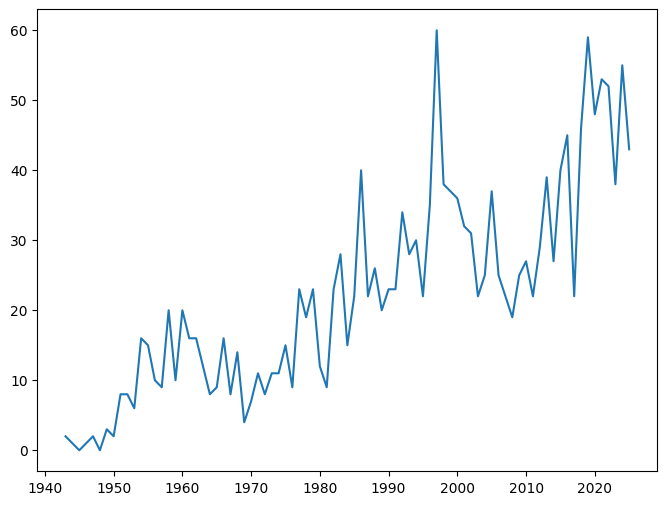

In [304]:
plt.figure(figsize=(8,6))
plt.plot(f.index,f['ApplNo'])
plt.show()

<font size='3'> From the above plot we can say that the number of drug approved in an year has also increased significantly.

<font size='3'> Lets find the peak Drug Approval per Year in 21st century

In [305]:
# Filtering year between 2010 till 2024
filter_dj=dj[dj['SubmissionStatusDate'].dt.year.isin(range(2010, 2025))]

In [306]:
group_year=filter_dj.groupby(dj['SubmissionStatusDate'].dt.year)['ApplNo'].nunique().reset_index()

In [307]:
group_year

,SubmissionStatusDate,ApplNo
0,2010,21
1,2011,29
2,2012,38
3,2013,27
4,2014,40
5,2015,45
6,2016,22
7,2017,46
8,2018,59
9,2019,48


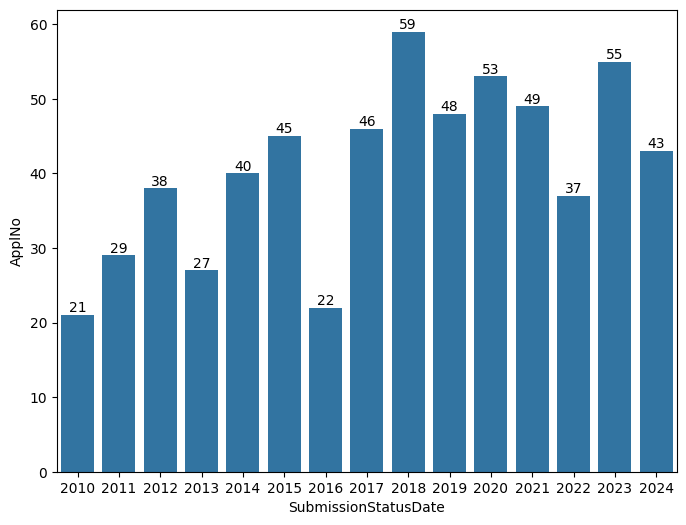

In [308]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=group_year.SubmissionStatusDate,y=group_year.ApplNo,data=group_year)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

<font size='3'> The max no. of Novel drug approved in single year in 21st century are 59 in 2018.

In [309]:
# Finding which company has max drug approved in 2018
s = dj[dj['SubmissionStatusDate'].dt.year==2018]

In [310]:
s['MarketingStatusID'].value_counts()

MarketingStatusID
1    54
3     5
Name: count, dtype: int64

<font size='3'>5 drugs has been discontinued out of 59 drugs which were approved in 2018.

In [311]:
s.head()

,ApplNo,ApplType,SponsorName,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,SubmissionClassCode,SubmissionClassCodeDescription,ProductNo,Form,Strength,DrugName,ActiveIngredient,MarketingStatusID
4123,208700,NDA,AAA USA INC,7.0,ORIG,1,AP,2018-01-26,PRIORITY,TYPE 1,Type 1 - New Molecular Entity,1,SOLUTION;INTRAVENOUS,10mCi/ML,LUTATHERA,LUTETIUM LU 177 DOTATATE,1
4247,210251,NDA,GILEAD SCIENCES INC,8.0,ORIG,1,AP,2018-02-07,PRIORITY,TYPE 1/4,Type 1 - New Molecular Entity and Type 4 - New...,1,TABLET;ORAL,EQ 50MG BASE;200MG;EQ 25MG BASE,BIKTARVY,BICTEGRAVIR SODIUM; EMTRICITABINE; TENOFOVIR A...,1
4258,210491,NDA,VERTEX PHARMS INC,8.0,ORIG,1,AP,2018-02-12,PRIORITY,TYPE 1/4,Type 1 - New Molecular Entity and Type 4 - New...,1,TABLET;ORAL,"150MG;150MG, 100MG",SYMDEKO (COPACKAGED),"IVACAFTOR; IVACAFTOR, TEZACAFTOR",1
4304,210951,NDA,JANSSEN BIOTECH,7.0,ORIG,1,AP,2018-02-14,PRIORITY,TYPE 1,Type 1 - New Molecular Entity,1,TABLET;ORAL,60MG,ERLEADA,APALUTAMIDE,1
4772,761065,BLA,THERATECHNOLOGIES,7.0,ORIG,1,AP,2018-03-06,PRIORITY,TYPE 1,Type 1 - New Molecular Entity,1,INJECTABLE;INJECTION,150MG/ML,TROGARZO,IBALIZUMAB-UIYK,1


In [312]:
f = s.groupby('SponsorName')['ApplNo'].nunique()

In [313]:
f.idxmax(),f.max()

('PFIZER', 4)

<font size='3'> 'PFIZER' had max no. of drug approved in 2018 with 4 drugs approved.

In [314]:
x=s['Form'].value_counts().reset_index()

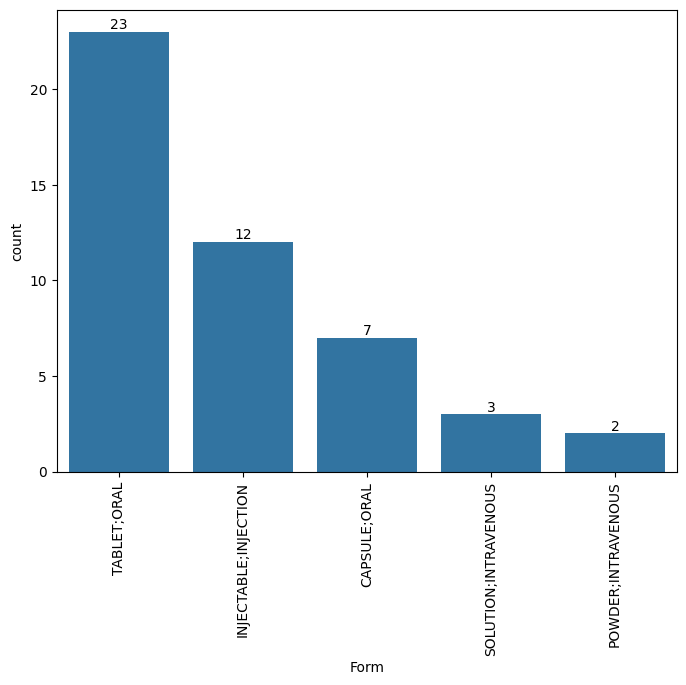

In [315]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=x['Form'].head(),y=x['count'].head())
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=90)
plt.show()

<font size='3'> Out of 59 Novel drugs approved in 2018 most approved form of drug was TABLET;ORAL

In [316]:
# Finding most approved From of drug for TYPE1 

In [317]:
dj['Form'].value_counts()

Form
TABLET;ORAL                         621
INJECTABLE;INJECTION                367
CAPSULE;ORAL                        225
SOLUTION;INTRAVENOUS                 54
POWDER;INTRAVENOUS                   43
                                   ... 
POWDER;ORAL, RECTAL                   1
SOLUTION;INTRAMUSCULAR                1
SOLUTION;INTRAPERITONEAL              1
POWDER;INTRAVENOUS, SUBCUTANEOUS      1
INJECTION;SOLUTION                    1
Name: count, Length: 132, dtype: int64

In [318]:
q=dj['Form'].value_counts().reset_index()
q.head()

,Form,count
0,TABLET;ORAL,621
1,INJECTABLE;INJECTION,367
2,CAPSULE;ORAL,225
3,SOLUTION;INTRAVENOUS,54
4,POWDER;INTRAVENOUS,43


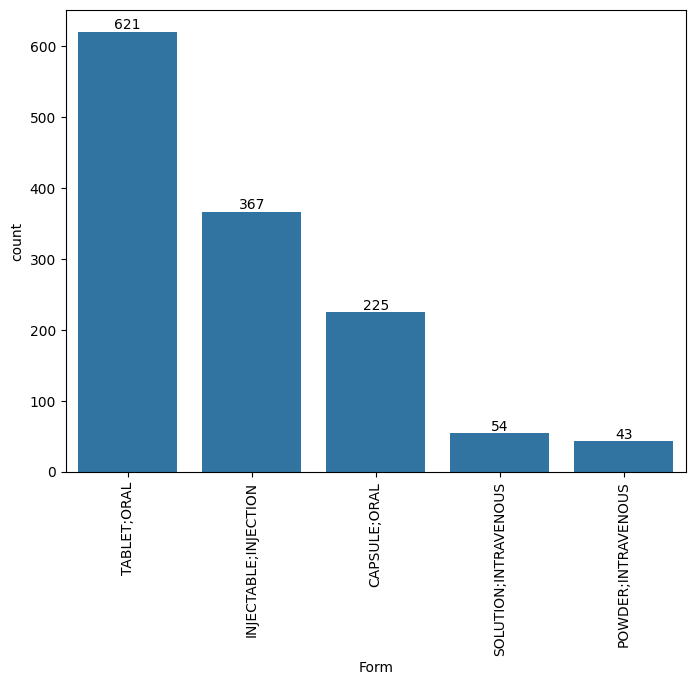

In [319]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=q['Form'].head(),y=q['count'].head())
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=90)
plt.show()


<font size='4'>Between 1940 and 2024 most approved TYPE 1 Novel Drug form is TABLET:ORAL followed by INJECTABLE;INJECTION

In [320]:
s.head()

,ApplNo,ApplType,SponsorName,SubmissionClassCodeID,SubmissionType,SubmissionNo,SubmissionStatus,SubmissionStatusDate,ReviewPriority,SubmissionClassCode,SubmissionClassCodeDescription,ProductNo,Form,Strength,DrugName,ActiveIngredient,MarketingStatusID
4123,208700,NDA,AAA USA INC,7.0,ORIG,1,AP,2018-01-26,PRIORITY,TYPE 1,Type 1 - New Molecular Entity,1,SOLUTION;INTRAVENOUS,10mCi/ML,LUTATHERA,LUTETIUM LU 177 DOTATATE,1
4247,210251,NDA,GILEAD SCIENCES INC,8.0,ORIG,1,AP,2018-02-07,PRIORITY,TYPE 1/4,Type 1 - New Molecular Entity and Type 4 - New...,1,TABLET;ORAL,EQ 50MG BASE;200MG;EQ 25MG BASE,BIKTARVY,BICTEGRAVIR SODIUM; EMTRICITABINE; TENOFOVIR A...,1
4258,210491,NDA,VERTEX PHARMS INC,8.0,ORIG,1,AP,2018-02-12,PRIORITY,TYPE 1/4,Type 1 - New Molecular Entity and Type 4 - New...,1,TABLET;ORAL,"150MG;150MG, 100MG",SYMDEKO (COPACKAGED),"IVACAFTOR; IVACAFTOR, TEZACAFTOR",1
4304,210951,NDA,JANSSEN BIOTECH,7.0,ORIG,1,AP,2018-02-14,PRIORITY,TYPE 1,Type 1 - New Molecular Entity,1,TABLET;ORAL,60MG,ERLEADA,APALUTAMIDE,1
4772,761065,BLA,THERATECHNOLOGIES,7.0,ORIG,1,AP,2018-03-06,PRIORITY,TYPE 1,Type 1 - New Molecular Entity,1,INJECTABLE;INJECTION,150MG/ML,TROGARZO,IBALIZUMAB-UIYK,1


In [321]:
df[df['MarketingStatusID']==3].shape # MarketingStatusID 3 is discontinued drugs

(2302, 17)

In [322]:
df.shape

(4910, 17)

In [323]:
df[df['MarketingStatusID']==1].shape

(2468, 17)

In [324]:
df[df['MarketingStatusID']==2].shape

(140, 17)

In [325]:
df_4

,MarketingStatusID,MarketingStatusDescription
0,1,Prescription
1,2,Over-the-counter
2,3,Discontinued
4,5,For Further Manufacturing Use


<font size='3'> 4910 Novel drugs TYPE 1 where approved by FDA between 1940 and 2024 from which 2302 drugs has been discontinued and out of remaining drugs 2468 are prescribed and 140 can be bought over the counter.

In [326]:
sponsor=df.groupby('SponsorName')['ApplNo'].nunique()

In [327]:
sponsor.sort_values(inplace=True,ascending=False)
sponsor


SponsorName
NOVARTIS               112
PFIZER                 110
ABBVIE                  99
BAXTER HLTHCARE         73
HOSPIRA                 72
                      ... 
IBSA INST BIO            1
IC TARGETS               1
ICEUTICA OPERATIONS      1
IMCLONE                  1
zr pharma&               1
Name: ApplNo, Length: 1085, dtype: int64

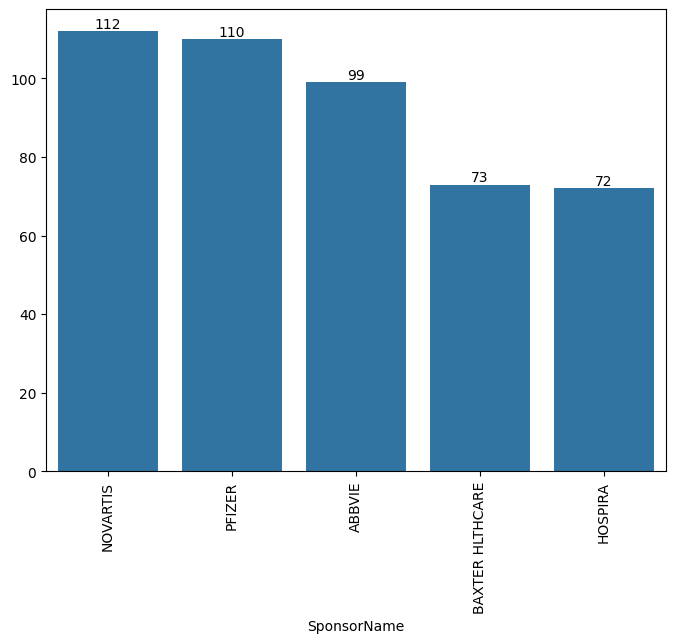

In [330]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=sponsor.head().index,y=sponsor.head().values)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(rotation=90)
plt.show()
